In [11]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import parse_records as pr
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import scipy as sc
import starter

In [17]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [18]:
all_weights = pr.parse_all("weights_format.txt")
np.array(all_weights).shape

(7, 100, 10)

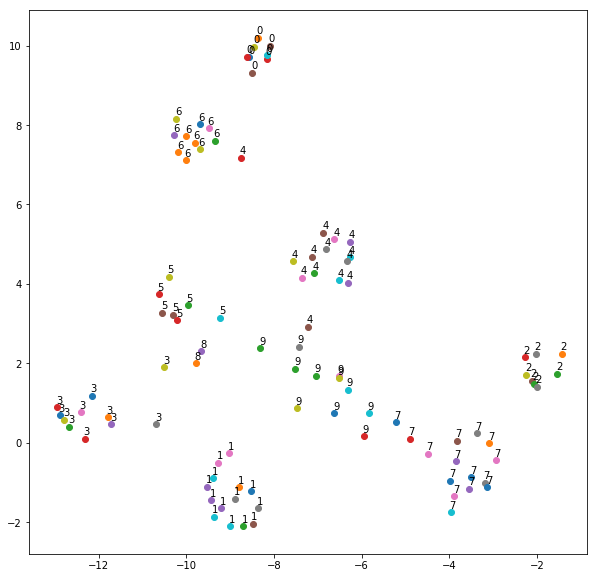

In [24]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
initWeights = tsne.fit_transform(all_weights[0])
starter.plot_with_labels(initWeights,mnist.test.labels[:100])

In [25]:
tsne.set_params(init=lowDWeights)

TSNE(angle=0.5, early_exaggeration=12.0,
   init=array([[ 1.38667, -4.85284],
       [-2.75424, -5.82527],
       ...,
       [ 2.33957,  4.41675],
       [ 2.07232, -1.22334]], dtype=float32),
   learning_rate=200.0, method='barnes_hut', metric='euclidean',
   min_grad_norm=1e-07, n_components=2, n_iter=5000,
   n_iter_without_progress=300, perplexity=30, random_state=None,
   verbose=0)

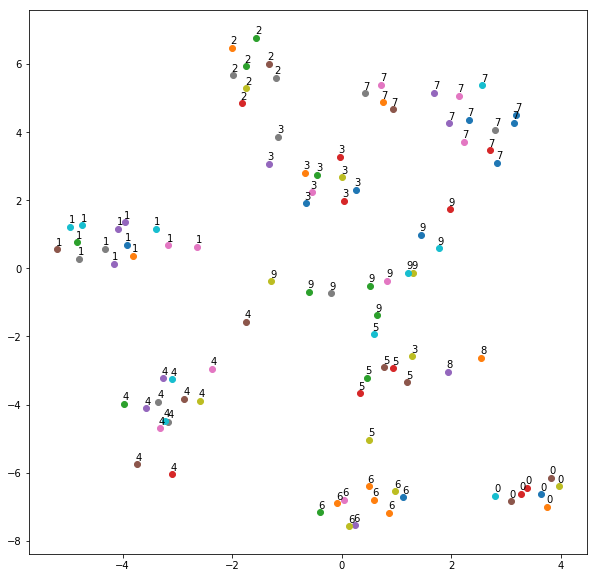

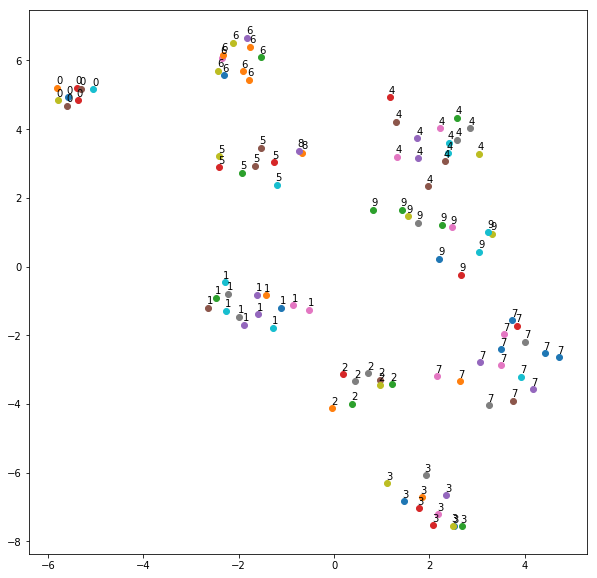

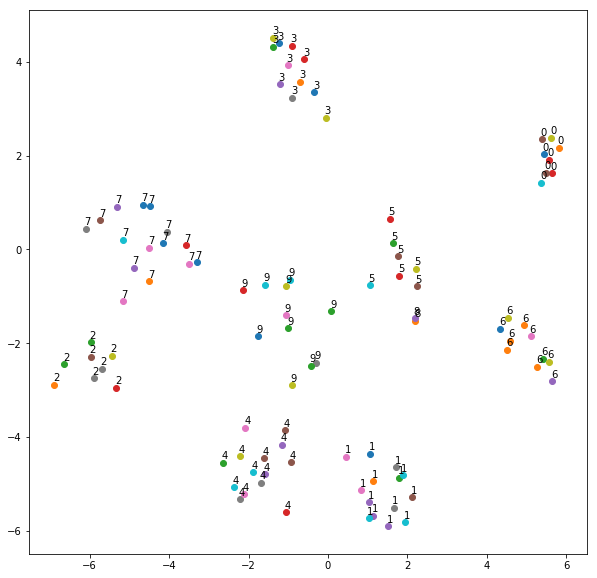

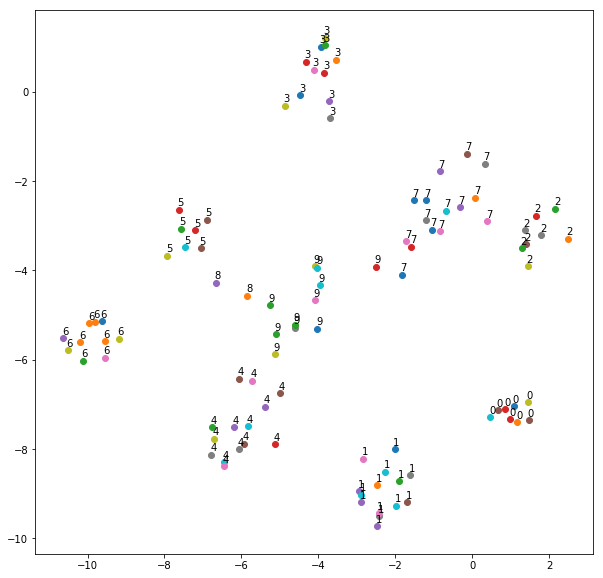

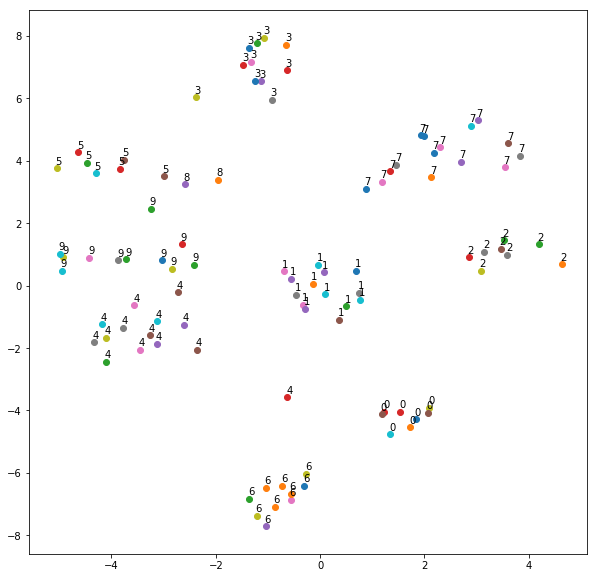

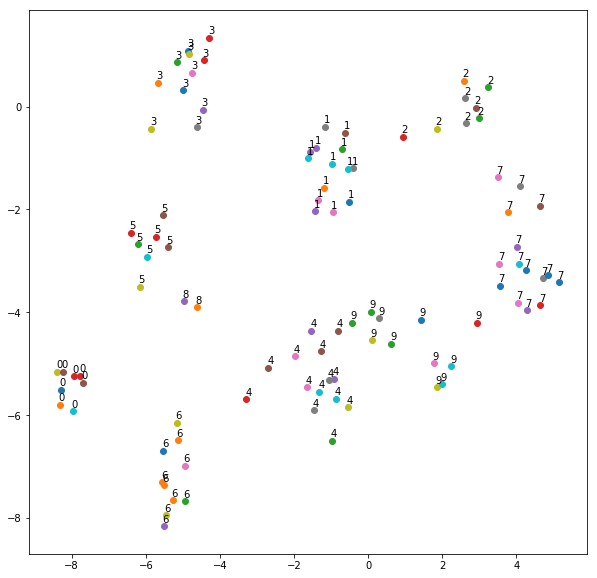

In [30]:
for i in range(1, len(all_weights)):
    lowDWeights = tsne.fit_transform(all_weights[i])
    starter.plot_with_labels(lowDWeights,mnist.test.labels[:100], "epoch"+str(i)+"_tnseAlign")